**A small intro pandas task**

1. Which location brought the most registrations to Send-a-Tree?
2. Which micro segment (combination of 'source', 'phone_type', 'location' and 'birth_year') has the most registered users?
3. What source brought the most super tree sends?
4. Visualize the number of daily registrations on a line chart!

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
registration = pd.read_csv('/home/dataguy/registration/registration.csv', delimiter = ' ', names=['day','date','time','user_id','event','birth_year','phone','country','source'])

In [21]:
#the answer:
registration.head()

,day,date,time,user_id,event,birth_year,phone,country,source
0,day_1,2019-09-13,00:32:11,1000001,registration,1983,android,sweden,invite_a_friend
1,day_1,2019-09-13,00:55:42,1000002,registration,1986,ios,united_states,invite_a_friend
2,day_1,2019-09-13,01:05:20,1000003,registration,1989,error,sweden,invite_a_friend
3,day_1,2019-09-13,01:23:24,1000004,registration,1994,error,germany,invite_a_friend
4,day_1,2019-09-13,01:24:16,1000005,registration,1986,ios,united_states,invite_a_friend


1. Which location brought the most registrations to Send-a-Tree?

In [8]:
registration.groupby('country').count()[['event']].sort_values(by = 'event',ascending=False)

,event
country,
united_states,103934
brazil,51957
sweden,31834
philippines,21060
germany,20832


2. Which micro segment (combination of 'source', 'phone_type', 'location' and 'birth_year') has the most registered users?

In [76]:
#the answer:
registration.groupby(['source','phone','country','birth_year']).count()[['user_id']].sort_values(by = 'user_id',ascending=False).iloc[[0]]

,,,,user_id
source,phone,country,birth_year,
invite_a_friend,android,united_states,1987,2496


3. What source brought the most super tree sends?

In [18]:
super_tree = pd.read_csv('/home/dataguy/super_tree/super_tree.csv', header = None, delimiter = ' ', names = ['day','date','user_id','event'])

In [19]:
super_tree.head()

,day,date,user_id,event
0,day_1,2019-09-13,1000080,sent_a_super_tree
1,day_1,2019-09-13,1000080,sent_a_super_tree
2,day_1,2019-09-13,1000042,sent_a_super_tree
3,day_1,2019-09-13,1000037,sent_a_super_tree
4,day_1,2019-09-13,1000037,sent_a_super_tree


In [22]:
reg_super = registration.merge(super_tree, on='user_id')

In [27]:
reg_super.head()

,day_x,date_x,time,user_id,event_x,birth_year,phone,country,source,day_y,date_y,event_y
0,day_1,2019-09-13,01:34:53,1000007,registration,1994,android,sweden,invite_a_friend,day_1,2019-09-13,sent_a_super_tree
1,day_1,2019-09-13,02:07:31,1000010,registration,1993,error,brazil,invite_a_friend,day_1,2019-09-13,sent_a_super_tree
2,day_1,2019-09-13,02:07:31,1000010,registration,1993,error,brazil,invite_a_friend,day_2,2019-09-14,sent_a_super_tree
3,day_1,2019-09-13,02:07:31,1000010,registration,1993,error,brazil,invite_a_friend,day_2,2019-09-14,sent_a_super_tree
4,day_1,2019-09-13,02:07:31,1000010,registration,1993,error,brazil,invite_a_friend,day_2,2019-09-14,sent_a_super_tree


In [24]:
reg_super.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141427 entries, 0 to 141426
Data columns (total 12 columns):
day_x         141427 non-null object
date_x        141427 non-null object
time          141427 non-null object
user_id       141427 non-null int64
event_x       141427 non-null object
birth_year    141427 non-null int64
phone         141427 non-null object
country       141427 non-null object
source        141427 non-null object
day_y         141427 non-null object
date_y        141427 non-null object
event_y       141427 non-null object
dtypes: int64(2), object(10)
memory usage: 14.0+ MB


In [26]:
#the answer:
reg_super.groupby('source').count()[['event_y']].sort_values(by = 'event_y', ascending=False).iloc[[0]]

,event_y
source,
invite_a_friend,117241


4. Visualize the number of daily registrations on a line chart.

In [32]:
reg_by_date = registration.groupby('date').count()[['user_id']].reset_index(inplace=False)

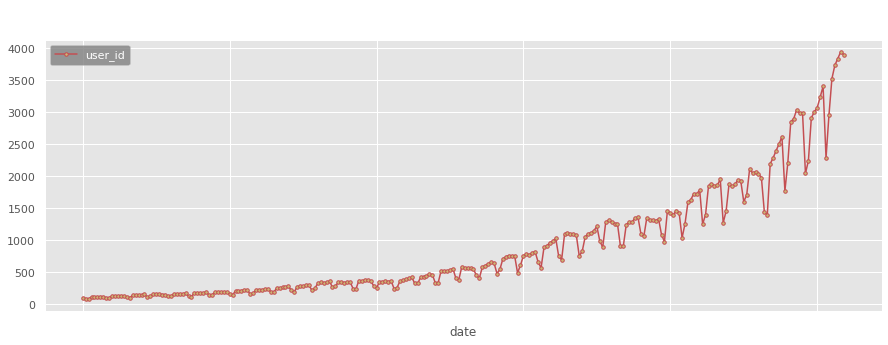

In [72]:
plt.style.use('seaborn-bright')
reg_by_date.plot.line(x='date',y='user_id',figsize=(15,5),marker='o',color='r',markersize=3.5,markerfacecolor='y')
plt.title('Number of Daily Registrations\nSend A Tree Project')
plt.legend(facecolor = 'grey')